In [1]:
import os
import json
from deta import Deta
import pandas as pd
import numpy as np
from datetime import datetime
from dotenv import load_dotenv
from IPython.display import Image

### Load DB key

In [2]:
load_dotenv("expense_tracker_app/.env")
DETA_KEY = os.getenv("DETA_KEY")

### Initialize DB

In [3]:
deta = Deta(DETA_KEY)
db = deta.Base("defects_db")
drive = deta.Drive("defects_imgs")

### DB functions

In [4]:
def upload_data(image_data, defect_type, details):
    date_time = datetime.now()
    date = date_time.strftime("%m/%d/%Y")
    time = date_time.strftime("%H:%M:%S")
    return db.put({"key": str(date_time.timestamp()), "date": date, "time": time, "image_data": image_data, "defect_type": defect_type, "details": details})

def fetch_data(period):
    return db.get(period)

def fetch_all_data():
    res = db.fetch()
    return res.items

### Example data & upload

In [30]:
# image_data = "new-img"
# defect_type = "Slubs"
# details = {'PO': 'P0X-2929', 'K1': '13200046', 'Qty': 300}
# upload_data(image_data, defect_type, details)

{'date': '06/29/2023',
 'defect_type': 'Slubs',
 'details': {'K1': '13200046', 'PO': 'P0X-2929', 'Qty': 300},
 'image_data': 'new-img',
 'key': '1688060929.787246',
 'time': '23:18:49'}

In [5]:
defects_data = fetch_all_data()
df = pd.DataFrame(defects_data)
df

,date,defect_type,details,image_name,key,time
0,07/05/2023,"Slubs,","{'Customer': 'test', 'K1': '100001', 'PO': 'te...",1688579889.539379,1688579889.539379,23:28:09
1,07/06/2023,,"{'Customer': '', 'K1': '', 'PO': '', 'Qty': 0}",NaN,1688665200.012848,23:10:00
2,07/06/2023,,"{'Customer': '', 'K1': '', 'PO': '', 'Qty': 0}",NaN,1688665293.667875,23:11:33
3,07/06/2023,"Slubs,","{'Customer': 'test', 'K1': 'test', 'PO': 'test...",NaN,1688665352.362233,23:12:32
4,07/06/2023,"Slubs,","{'Customer': 'test', 'K1': 'test', 'PO': 'test...",NaN,1688665517.933529,23:15:18


In [6]:
drive.list()['names']

['1688665517.933529',
 '1688836804.74874',
 '1688836846.196303',
 '1688836873.111021',
 '1688837019.590461',
 '1688837076.249884']

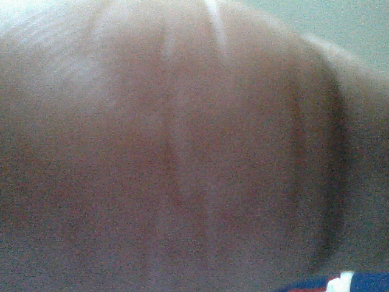

In [8]:
img_file = drive.get('1688836804.74874').read()
Image(img_file)

In [9]:
drive.delete('1688836804.74874')

'1688836804.74874'

In [10]:
db.delete('1688836804.74874')

In [11]:
for k in df.key:
    print(k)
    # db.delete(k)

1688579889.539379
1688665200.012848
1688665293.667875
1688665352.362233
1688665517.933529


In [39]:
# df.to_csv("expense_tracker_app/ignore/test.csv", index=False)

In [41]:
# df2 = pd.read_csv("expense_tracker_app/ignore/test.csv")
# df2

,date,defect_type,details,image_data,key,time
0,06/29/2023,Slubs,"{'K1': '13200046', 'PO': 'P0X-2929', 'Qty': 300}",new-img,1.688060e+09,23:03:27
1,06/29/2023,Slubs,"{'K1': '13200046', 'PO': 'P0X-2929', 'Qty': 300}",new-img,1.688061e+09,23:18:49
2,06/30/2023,['Slubs'],"{'Customer': '', 'K1': 'A121A041', 'PO': 'F01-...",type-1,1.688064e+09,00:13:55
3,07/02/2023,['Splices'],"{'Customer': 'Laguna', 'K1': 'A150C127', 'PO':...",type-1,1.688316e+09,22:14:19
4,07/02/2023,['Splices'],"{'Customer': 'Laguna', 'K1': 'A150C127', 'PO':...",type-1,1.688316e+09,22:14:54
5,07/02/2023,SplicesSlubs,"{'Customer': 'Laguna', 'K1': 'A150C127', 'PO':...",type-1,1.688317e+09,22:31:09
6,07/02/2023,+Splices+Slubs,"{'Customer': 'Laguna', 'K1': 'A150C127', 'PO':...",type-1,1.688317e+09,22:32:07
7,07/02/2023,Warp lining+,"{'Customer': 'Laguna', 'K1': 'A150C127', 'PO':...",type-1,1.688317e+09,22:32:53
8,07/02/2023,Warp lining+Slubs+Splices+,"{'Customer': 'Laguna', 'K1': 'A150C127', 'PO':...",type-1,1.688318e+09,22:36:32
